In [ ]:
#Importing and reading the dataframe
import pandas as pd
df2023 = pd.read_csv("/FY2023_068_Contracts_Full_20240208.zip")
df2023

<ipython-input-45-00d5850c8a01>:2: DtypeWarning: Columns (47,52,68,81,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df2023 = pd.read_csv("/FY2023_068_Contracts_Full_20240208.zip")


,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,...,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink,initial_report_date,last_modified_date
0,6800_-NONE-_68HE0B21P0185_P00007_-NONE-_0,CONT_AWD_68HE0B21P0185_6800_-NONE-_-NONE-,68HE0B21P0185,P00007,0.0,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2023-09-13,2023-09-13
1,6800_-NONE-_68HE0B21P0185_P00006_-NONE-_0,CONT_AWD_68HE0B21P0185_6800_-NONE-_-NONE-,68HE0B21P0185,P00006,0.0,NaN,NaN,NaN,NaN,23913.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2022-12-07,2022-12-30
2,6800_6800_0005_P00020_EPC18008_0,CONT_AWD_0005_6800_EPC18008_6800,0005,P00020,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,EPC18008,0,0.00,...,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,https://www.usaspending.gov/award/CONT_AWD_000...,2023-03-13,2023-03-16
3,6800_6800_0005_P00024_EPC18008_0,CONT_AWD_0005_6800_EPC18008_6800,0005,P00024,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,EPC18008,0,0.00,...,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,https://www.usaspending.gov/award/CONT_AWD_000...,2023-06-22,2023-08-09
4,6800_6800_0005_P00022_EPC18008_0,CONT_AWD_0005_6800_EPC18008_6800,0005,P00022,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,EPC18008,0,0.00,...,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,SHERYLL MANOJ,345000.0,https://www.usaspending.gov/award/CONT_AWD_000...,2023-06-09,2023-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12537,6800_6800_68HE0923F0062_0_68HE0923D0002_0,CONT_AWD_68HE0923F0062_6800_68HE0923D0002_6800,68HE0923F0062,0,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,68HE0923D0002,0,261883.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2023-07-17,2023-07-17
12538,6800_6800_68HE0123F0035_0_68HE0119D0002_0,CONT_AWD_68HE0123F0035_6800_68HE0119D0002_6800,68HE0123F0035,0,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,68HE0119D0002,0,70000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2023-08-17,2023-08-22
12539,6800_4732_68HE0B23F0172_0_47QSWA18D008F_0,CONT_AWD_68HE0B23F0172_6800_47QSWA18D008F_4732,68HE0B23F0172,0,0.0,4732.0,FEDERAL ACQUISITION SERVICE,47QSWA18D008F,PO0246,42448.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2023-09-23,2023-09-25
12540,6800_6800_68HERH23F0406_0_68HE0321D0001_0,CONT_AWD_68HERH23F0406_6800_68HE0321D0001_6800,68HERH23F0406,0,0.0,6800.0,ENVIRONMENTAL PROTECTION AGENCY,68HE0321D0001,P00008,3400.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_68H...,2023-09-21,2023-09-21


In [ ]:
#Refining the DF to include relevant columns to our y variable
relevant_columns = [
    'contract_transaction_unique_key', 'contract_award_unique_key', 'award_id_piid',
    'federal_action_obligation',
    'woman_owned_business', 'women_owned_small_business', 'economically_disadvantaged_women_owned_small_business',
    'joint_venture_women_owned_small_business', 'minority_owned_business', 'other_minority_owned_business',
    'emerging_small_business', 'minority_institution',
    'primary_place_of_performance_state_code', 'primary_place_of_performance_country_code',
    'action_date', 'action_date_fiscal_year',
    'recipient_name', 'recipient_duns', 'naics_code', 'naics_description', 'potential_total_value_of_award'
]

new_2023 = df2023[relevant_columns]

# Display the first few rows of the filtered DataFrame to ensure it contains only the relevant columns
new_2023.head()
new_2023.shape

(12542, 21)

In [ ]:
#Label encoding the dataframe so there are no categorical variables
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['contract_transaction_unique_key', 'contract_award_unique_key', 'award_id_piid',
                     'woman_owned_business', #'women_owned_small_business',
                     'economically_disadvantaged_women_owned_small_business',
                     'joint_venture_women_owned_small_business', #'minority_owned_business',
                     'other_minority_owned_business', 'emerging_small_business', 'minority_institution',
                     'primary_place_of_performance_state_code', 'primary_place_of_performance_country_code',
                     'action_date', 'recipient_name', 'naics_description', 'primary_place_of_performance_state_code']  # List of columns you want to label encode

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through the list of columns and apply LabelEncoder to each
for column in columns_to_encode:
    new_2023[column] = le.fit_transform(new_2023[column])

new_2023.dtypes
new_2023.shape

<ipython-input-49-b0058804d6ce>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2023[column] = le.fit_transform(new_2023[column])
<ipython-input-49-b0058804d6ce>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2023[column] = le.fit_transform(new_2023[column])
<ipython-input-49-b0058804d6ce>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

(12542, 21)

In [ ]:
#Finding and dropping NA columns and rows to clean data and run regressions/trees/other models
new_2023.isna().mean()
new_2023.dropna(axis = 1, inplace = True)
#df2023.isna().sum()
new_2023.columns.isna()
new_2023.columns

<ipython-input-66-1d7da0f0bac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2023.dropna(axis = 1, inplace = True)


Index(['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'federal_action_obligation', 'woman_owned_business',
       'women_owned_small_business',
       'economically_disadvantaged_women_owned_small_business',
       'joint_venture_women_owned_small_business', 'minority_owned_business',
       'other_minority_owned_business', 'emerging_small_business',
       'minority_institution', 'primary_place_of_performance_state_code',
       'primary_place_of_performance_country_code', 'action_date',
       'action_date_fiscal_year', 'recipient_name', 'naics_description',
       'potential_total_value_of_award'],
      dtype='object')

In [ ]:
#Checking that we did not lose rows for later models
new_2023.shape

(12542, 19)

In [159]:
#Checking for null values
rows_with_nulls = new_2023[new_2023['recipient_name'].isnull() | new_2023['naics_description'].isnull()]

# Display rows with nulls (optional, for verification)
print(rows_with_nulls)


Empty DataFrame
Columns: [contract_transaction_unique_key, contract_award_unique_key, award_id_piid, federal_action_obligation, economically_disadvantaged_women_owned_small_business, joint_venture_women_owned_small_business, other_minority_owned_business, emerging_small_business, minority_institution, primary_place_of_performance_state_code, primary_place_of_performance_country_code, action_date, action_date_fiscal_year, recipient_name, naics_description, potential_total_value_of_award, women_owned_1, minority_owned_t, women_owned_small_business_t]
Index: []


In [ ]:
#Checking your work
new_2023.columns
new_2023.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,federal_action_obligation,economically_disadvantaged_women_owned_small_business,joint_venture_women_owned_small_business,other_minority_owned_business,emerging_small_business,minority_institution,primary_place_of_performance_state_code,primary_place_of_performance_country_code,action_date,action_date_fiscal_year,recipient_name,naics_description,potential_total_value_of_award,women_owned_1,minority_owned_t,women_owned_small_business_t
0,687,2513,2439,0.00,0,0,0,0,0,38,5,282,2023,622,149,69560.96,0,0,0
1,686,2513,2439,23913.48,0,0,0,0,0,38,5,71,2023,622,149,69560.96,0,0,0
2,3909,84,4,0.00,1,0,0,0,0,38,5,130,2023,114,89,556018.35,1,0,1
3,3916,84,4,0.00,1,0,0,0,0,38,5,250,2023,114,89,567243.48,1,0,1
4,3913,84,4,0.00,1,0,0,0,0,38,5,197,2023,114,89,556018.35,1,0,1


In [160]:
#Re encoding women-owned small business and minority owned business to integers
new_2023 = pd.get_dummies(new_2023, columns = ['woman_owned_business','women_owned_small_business', 'minority_owned_business'],
                         prefix = ['women_owned', 'minority_owned'], drop_first = True)
new_2023.head()
new_2023.dtypes

KeyError: "None of [Index(['woman_owned_business', 'women_owned_small_business',\n       'minority_owned_business'],\n      dtype='object')] are in the [columns]"

In [ ]:
#Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [143]:
###Preparing for models by creating X,Y, Train,Test, etc
new_2023 = new_2023.dropna(subset=['recipient_name', 'naics_description'])


# Mock data preparation
X = new_2023.drop('potential_total_value_of_award', axis = 1)  # Example features
y_reg = new_2023['potential_total_value_of_award']  # Regression target
y_class = (new_2023['potential_total_value_of_award'] > 1000000)  # Classification target, simplified

# Deal with missing values on the columns recipient_duns and naics_code
X.dropna(subset=['recipient_name', 'naics_description'], inplace=True)

# Split the data for regression

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.5, random_state=100)

# Define the parameter grid to search over
param_grid = {
'n_estimators': [10, 30], # Example: Try with 100, 200, and 300 trees
'max_depth': [3,5, 7, 9,11], # None means unlimited depth. You can also try other limits
'min_samples_leaf': [0.05, 0.01, 0.03], # Minimum number of samples required at each leaf node
}

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [136]:
###Using a decision tree

param_grid_dt = {
'max_depth': [3,5, 7, 9,11], # None means unlimited depth. You can also try other limits
'min_samples_leaf': [0.05, 0.01, 0.03], # Minimum number of samples required at each leaf node
}

dt_class = GridSearchCV(DecisionTreeClassifier(),param_grid = param_grid_dt)

dt_class.fit(X_train_class, y_train_class)
y_pred_train_class = dt_class.predict(X_train_class)
y_pred_test_class = dt_class.predict(X_test_class)
print("Train Classification Accuracy( Decision Tree)", accuracy_score(y_train_class,y_pred_train_class))
print("Test Classification Accuracy( Decision Tree):", accuracy_score(y_test_class, y_pred_test_class))


Train Classification Accuracy( Decision Tree) 0.7524170238213894
Test Classification Accuracy( Decision Tree): 0.7361498605021921


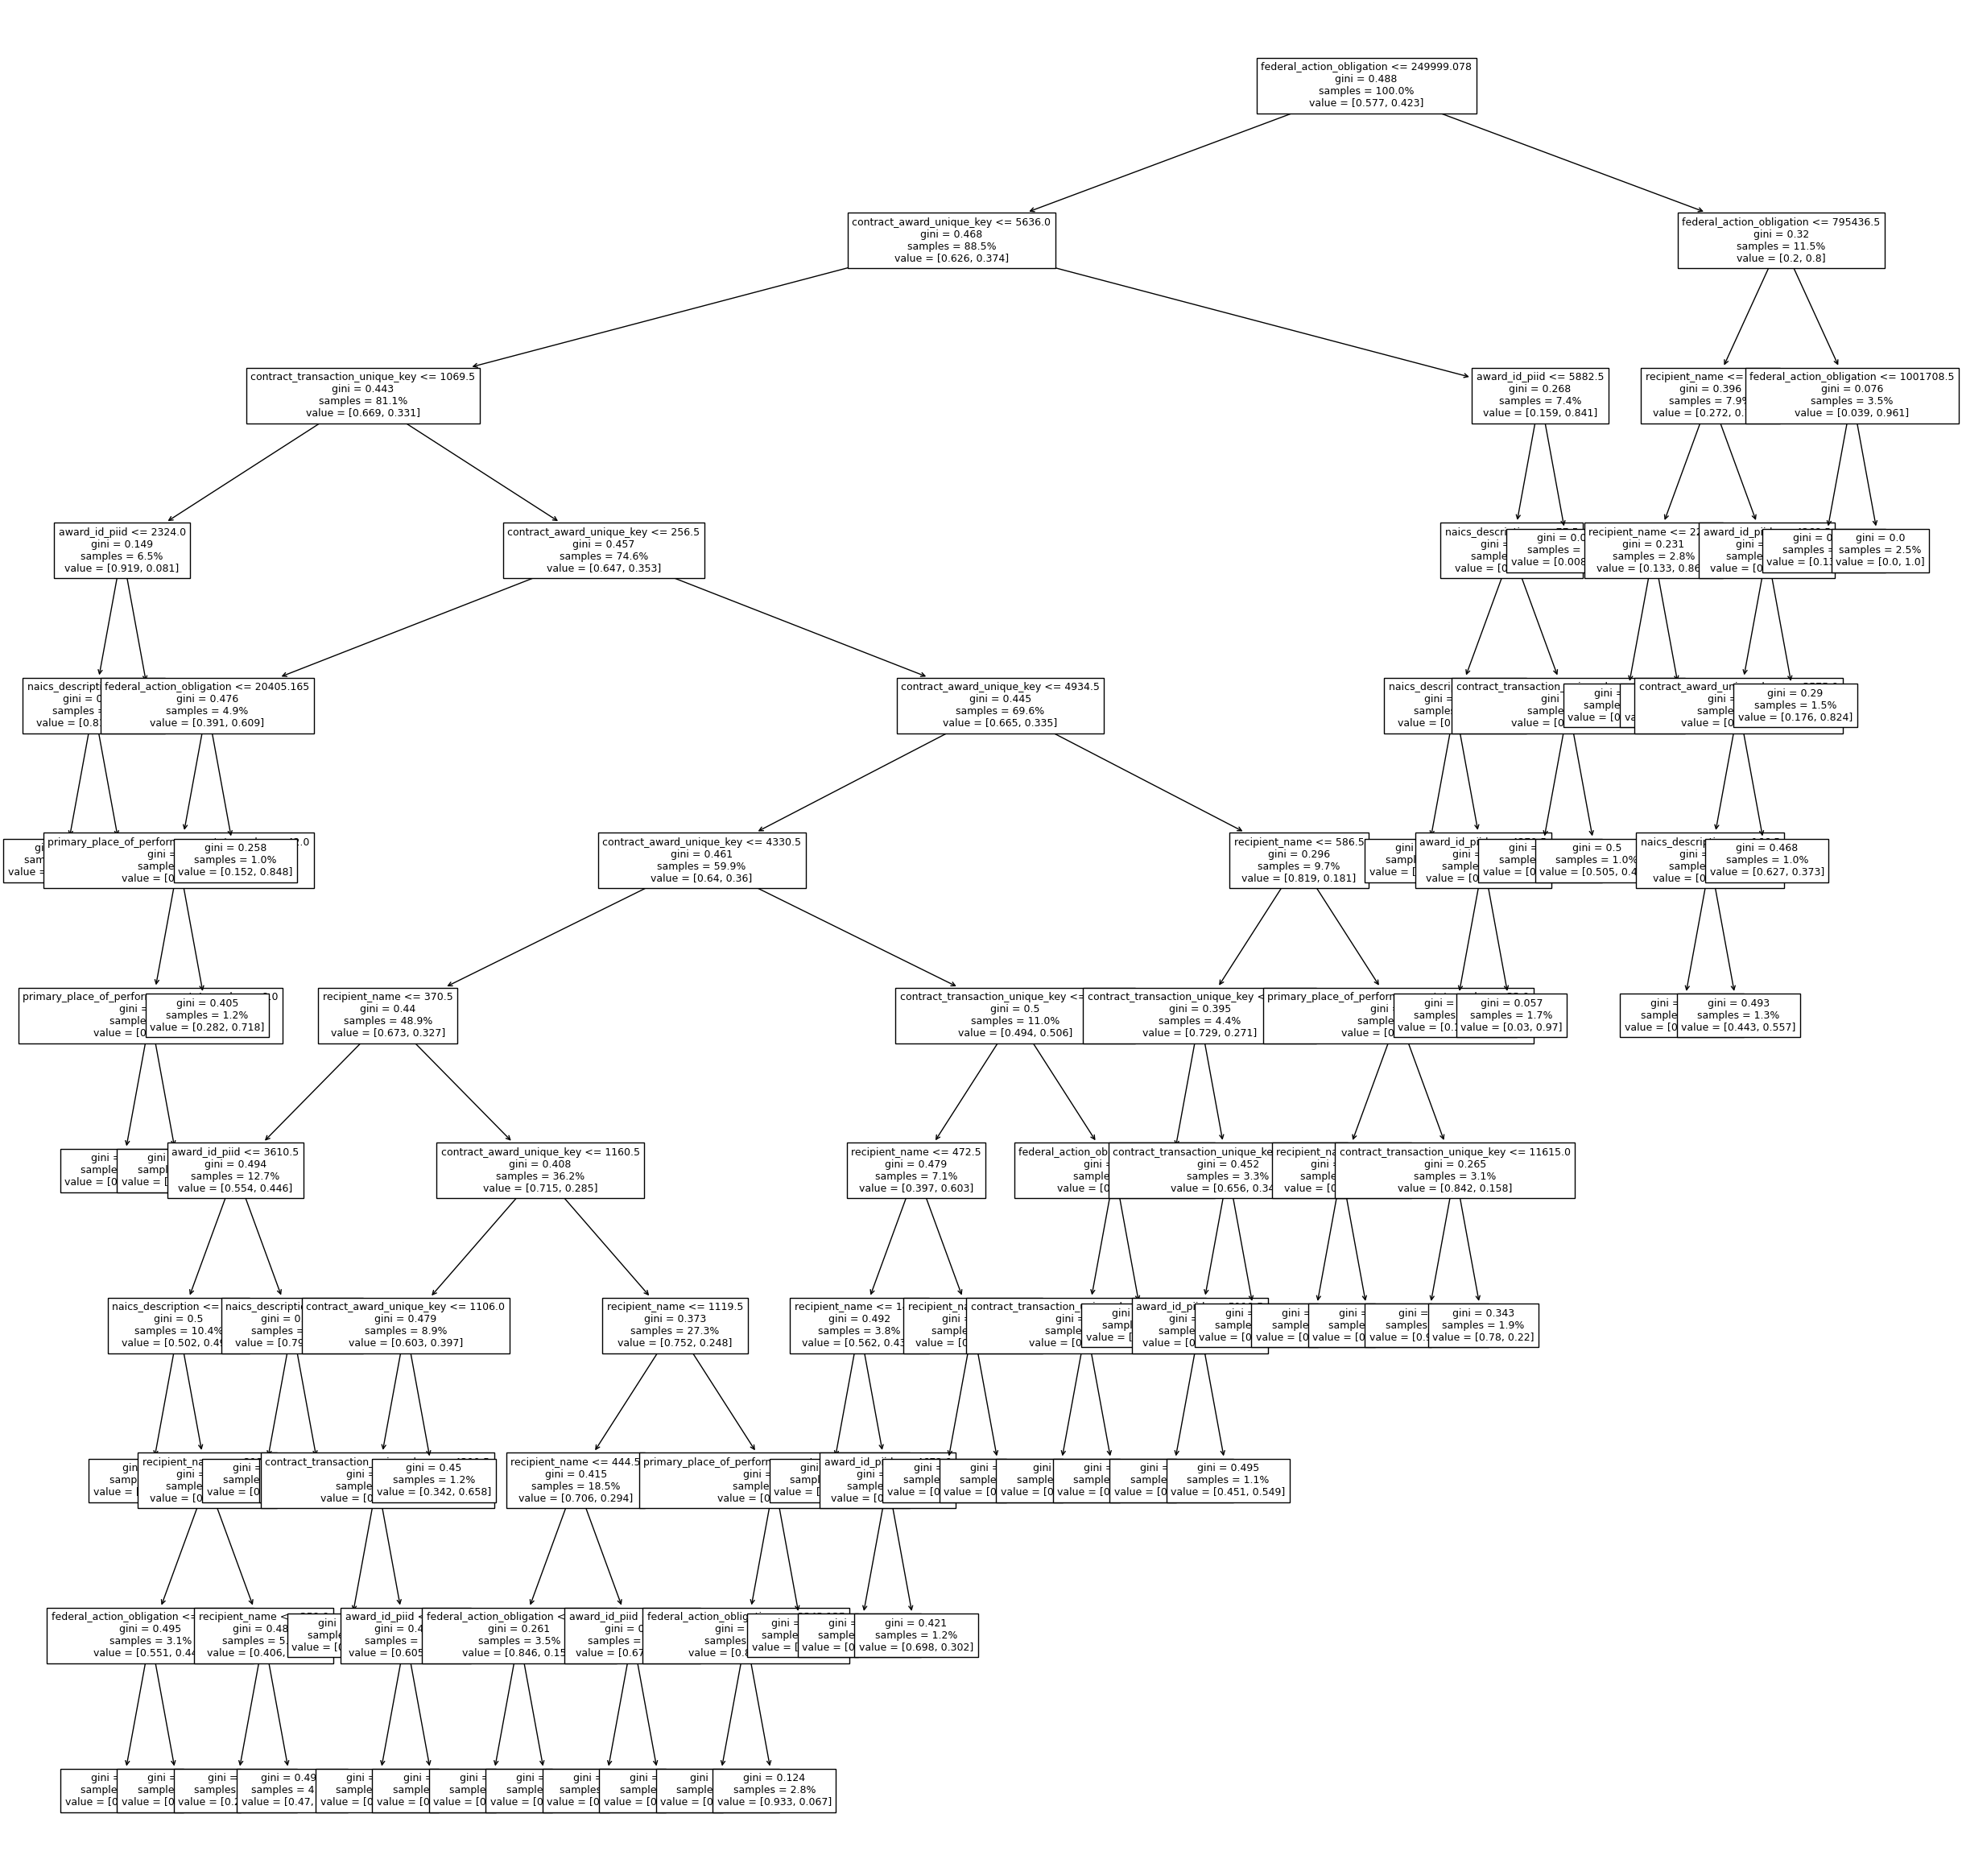

In [164]:
### Visualizing the Decision Tree
plt.figure(figsize=(30,30)) #Changing the size of the tree
plot_tree(dt_class.best_estimator_,feature_names=X.columns, fontsize = 9, proportion = True )
plt.show()

In [145]:
# Random Forest Classification
rf_class = GridSearchCV(RandomForestClassifier(),param_grid = param_grid)
rf_class.fit(X_train_class, y_train_class)
y_pred_train_class = rf_class.predict(X_train_class)
y_pred_test_class = rf_class.predict(X_test_class)
print("Train Classification Accuracy for Forrest Classifier:", accuracy_score(y_train_class,y_pred_train_class))
print("Test Classification Accuracy for Forrest Classifier:", accuracy_score(y_test_class, y_pred_test_class))


Train Classification Accuracy for Forrest Classifier: 0.7511212997109539
Test Classification Accuracy for Forrest Classifier: 0.7469111199681148


Best Params for Random Forest Classifier: {'max_depth': 11, 'min_samples_leaf': 0.01, 'n_estimators': 10}


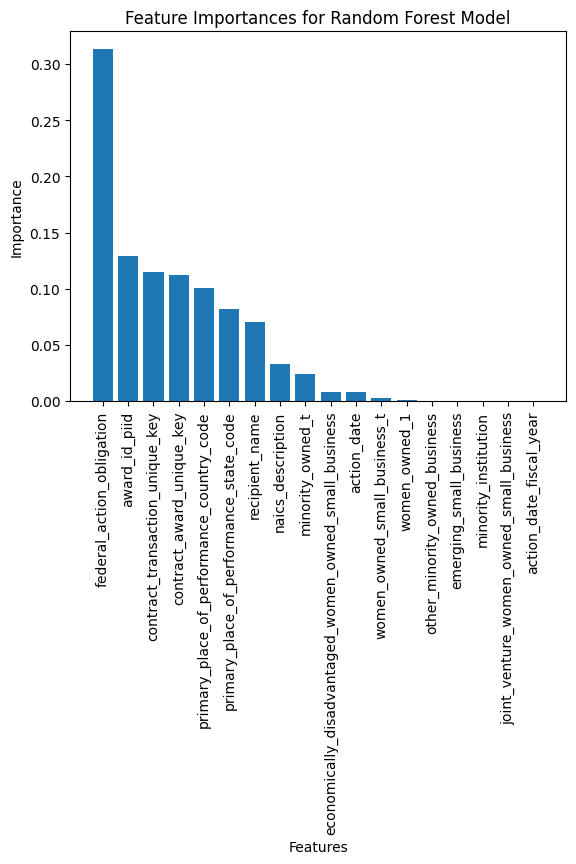

In [165]:
#Visualizing the Random Forest Classification

print("Best Params for Random Forest Classifier:", rf_class.best_params_)

#plotting feature importances
importances = pd.Series(rf_class.best_estimator_.feature_importances_,index = X.columns).sort_values(ascending = False)
plt.bar(importances.index,height = importances)
plt.xticks(rotation = 90)
plt.title("Feature Importances for Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()